In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def treeviz(tree): 
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data,  
                    feature_names=['petal (cm)', 'sepal (cm)'],  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

In [4]:
def plot_model_decision(model, proba=False):
    plt.figure(figsize=(8, 8))
    xx, yy = np.meshgrid(np.linspace(0, 9, 100),
                         np.linspace(0, 9, 100))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=0.3)


    for i, label in enumerate(iris.target_names):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

    plt.xlabel('Petal (cm)')
    plt.ylabel('Sepal (cm)')
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.legend(loc='best');

In [5]:
'''
output
- iris, <class 'sklearn.utils.Bunch'>
'''
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
'''
input
- iris, <class 'sklearn.utils.Bunch'>
'''
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
'''
input
- iris, <class 'sklearn.utils.Bunch'>
output
- X, shape(150, 2) of float64
     mean: 4.8007, variance: 2.9755, range: [1.0, 7.9]
- y, shape(150,) of int32
     mean: 1.0000, variance: 0.6667, range: [0, 2]
'''
X = iris.data[:, [2, 0]]
y = iris.target

In [8]:
'''
input
- X, shape(150, 2) of float64
- y, shape(150,) of int32
output
- X_train, shape(100, 2) of float64
           mean: 4.8155, variance: 2.8365, range: [1.1000, 7.7000]
- y_train, shape(100,) of int32
           mean: 1.0300, variance: 0.6491, range: [0, 2]
- X_test, shape(50, 2) of float64
          mean: 4.7710, variance: 3.2521, range: [1.0, 7.9]
- y_test, shape(50,) of int32
          mean: 0.9400, variance: 0.6964, range: [0, 2]
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=50, random_state=42)

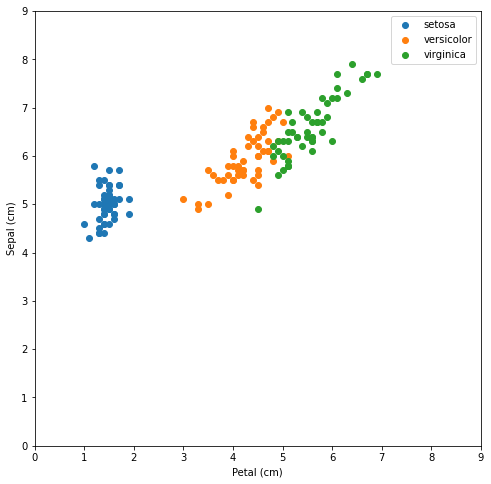

In [9]:
'''
input
- iris, <class 'sklearn.utils.Bunch'>
- X, shape(150, 2) of float64
- y, shape(150,) of int32
'''
plt.figure(figsize=(8, 8))
for i, label in enumerate(iris.target_names):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

plt.xlabel('Petal (cm)')
plt.ylabel('Sepal (cm)')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.legend(loc='best');

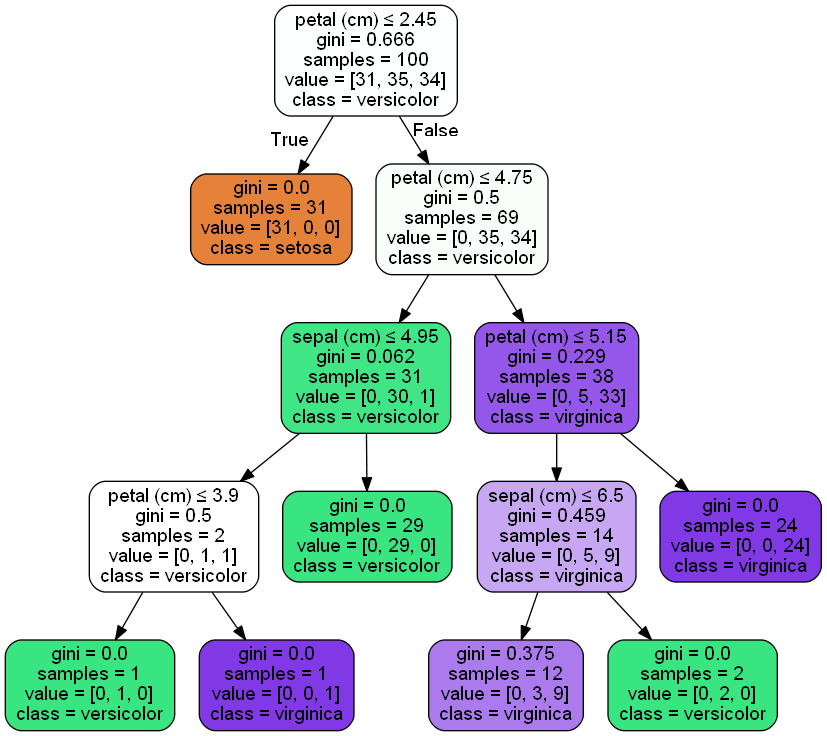

In [10]:
'''
input
- X_train, shape(100, 2) of float64
- y_train, shape(100,) of int32
output
- tree, <class 'sklearn.tree._classes.DecisionTreeClassifier'>, DecisionTreeClassifier(max_depth=4)
- X_train, shape(100, 2) of float64
           mean: 4.8155, variance: 2.8365, range: [1.1000, 7.7000]
- y_train, shape(100,) of int32
           mean: 1.0300, variance: 0.6491, range: [0, 2]
'''
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
treeviz(tree)

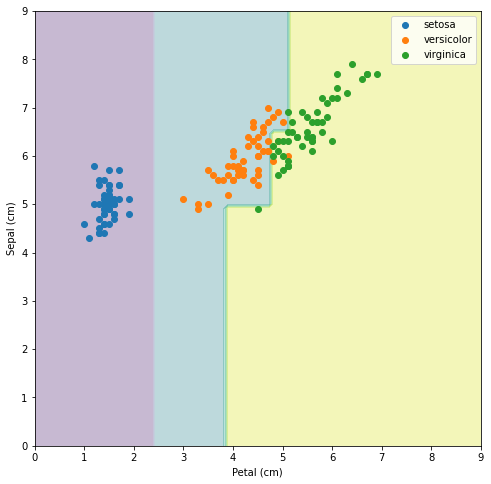

In [11]:
'''
input
- tree, <class 'sklearn.tree._classes.DecisionTreeClassifier'>
'''
plot_model_decision(tree)

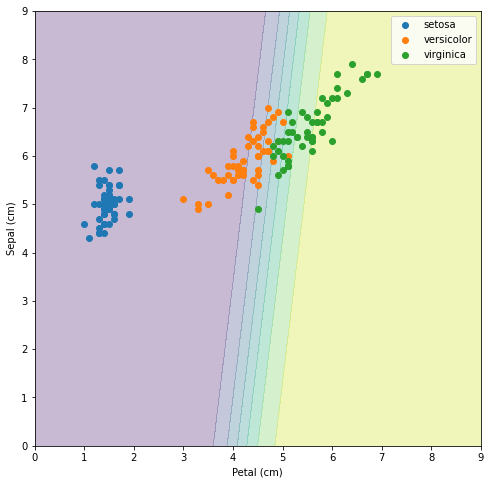

In [12]:
'''
input
- X_train, shape(100, 2) of float64
- y_train, shape(100,) of int32
output
- lr_model, <class 'sklearn.linear_model._logistic.LogisticRegression'>, LogisticRegression()
'''
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train[y_train != 0], y_train[y_train != 0])
plot_model_decision(lr_model, proba=True)

In [13]:
'''
input
- lr_model, <class 'sklearn.linear_model._logistic.LogisticRegression'>
'''
lr_model.coef_

array([[ 3.17162788, -0.37265789]])

In [14]:
'''
input
- lr_model, <class 'sklearn.linear_model._logistic.LogisticRegression'>
'''
lr_model.intercept_

array([-13.16169842])

In [20]:
'''
input
- X_train, shape(100, 2) of float64
- y_train, shape(100,) of int32
output
- linear_model, <class 'sklearn.linear_model._perceptron.Perceptron'>, Perceptron(max_iter=50)
'''
from sklearn.linear_model import Perceptron

linear_model = Perceptron(max_iter=50)
linear_model.fit(X_train[y_train != 0], y_train[y_train != 0])

Perceptron(max_iter=50)

In [21]:
'''
input
- linear_model, <class 'sklearn.linear_model._perceptron.Perceptron'>
- X_test, shape(50, 2) of float64
- y_test, shape(50,) of int32
output
- linear_model, <class 'sklearn.linear_model._perceptron.Perceptron'>, Perceptron(max_iter=50)
'''
linear_model.score(X_test[y_test != 0], y_test[y_test != 0])

0.8064516129032258

In [22]:
'''
input
- linear_model, <class 'sklearn.linear_model._perceptron.Perceptron'>
'''
linear_model.coef_

array([[ 63.7, -41.2]])

In [23]:
'''
input
- linear_model, <class 'sklearn.linear_model._perceptron.Perceptron'>
'''
linear_model.intercept_

array([-29.])

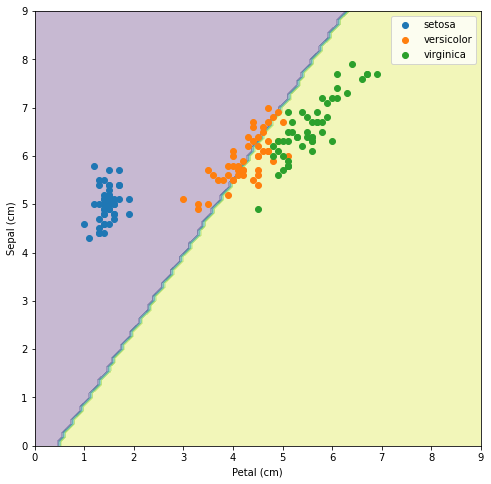

In [24]:
'''
input
- linear_model, <class 'sklearn.linear_model._perceptron.Perceptron'>
'''
plot_model_decision(linear_model)